<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Estandarización" data-toc-modified-id="Estandarización-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Estandarización</a></span></li><li><span><a href="#Codificación-con-datos-estandarizados" data-toc-modified-id="Codificación-con-datos-estandarizados-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Codificación con datos estandarizados</a></span><ul class="toc-item"><li><span><a href="#Variables-que-no-tienen-orden" data-toc-modified-id="Variables-que-no-tienen-orden-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Variables que no tienen orden</a></span></li><li><span><a href="#Variables-que-tienen-orden" data-toc-modified-id="Variables-que-tienen-orden-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Variables que tienen orden</a></span></li></ul></li><li><span><a href="#Codificación-con-datos-sin-estandarizar" data-toc-modified-id="Codificación-con-datos-sin-estandarizar-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Codificación con datos sin estandarizar</a></span><ul class="toc-item"><li><span><a href="#Variables-que-no-tienen-orden" data-toc-modified-id="Variables-que-no-tienen-orden-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Variables que no tienen orden</a></span></li><li><span><a href="#Variables-que-tienen-orden" data-toc-modified-id="Variables-que-tienen-orden-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Variables que tienen orden</a></span></li></ul></li><li><span><a href="#Desbalanceo-de-la-variable-respuesta" data-toc-modified-id="Desbalanceo-de-la-variable-respuesta-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Desbalanceo de la variable respuesta</a></span><ul class="toc-item"><li><span><a href="#Desbalanceo-usando-Pandas" data-toc-modified-id="Desbalanceo-usando-Pandas-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Desbalanceo usando Pandas</a></span><ul class="toc-item"><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span><strong>Downsampling</strong></a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span><strong>Upsampling</strong></a></span></li></ul></li><li><span><a href="#Desbalanceo-usando-imblearn-(RandomOverSample-y-RandomUnderSample)" data-toc-modified-id="Desbalanceo-usando-imblearn-(RandomOverSample-y-RandomUnderSample)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Desbalanceo usando imblearn (<em>RandomOverSample</em> y <em>RandomUnderSample</em>)</a></span><ul class="toc-item"><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span><strong>Downsampling</strong></a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span><strong>Upsampling</strong></a></span></li></ul></li><li><span><a href="#Desbalanceo-usando-imblearn-(SMOTE)" data-toc-modified-id="Desbalanceo-usando-imblearn-(SMOTE)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Desbalanceo usando imblearn (SMOTE)</a></span></li></ul></li></ul></div>

In [2]:
!%pip install imblearn

/bin/bash: line 0: fg: no job control


In [3]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

# Gestión datos desbalanceados
# ------------------------------------------------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


📌 **NOTA** Si os da error la celda anterior deberéis instalar `imblearn`, para eso haced 

```python
pip install imblearn
```

# Introducción

En el anterior jupyter hicimos un buen análisis exploratorio de nuestros datos para familiarizarnos con ellos. Pudimos entender como fue el accidente del titanic e incluso pudimos extraer algunos patrones o conclusiones. 

Sin embargo, nos quedaron algunas columnas de tipo categórico sin codificar y si recordamos en los modelos de regresión lineal teníamos que normalizar, estandarizar y evaluar si se cumplían las asunciones para enfrentarnos a este tipo de problemas. Pero aquí vienen unos puntos importantes a la hora de enfrentarnos a un problema de regresión logística. Recordemos: 

- La normalidad la evaluabamos en nuestra variable respuesta para ver si seguía una distribución de tipo campana de Gauss. **Pero ahora nuestra variable respuesta no es continua, es una variable de tipo binomial (si/no, vivo/muerto), POR LO TANTO NO TENDREMOS QUE NORMALIZAR LA VARIABLE RESPUESTA EN ESTE TIPO DE MODELOS** 

- El resto de las asunciones (independencia de las variables y homogeneidad de las varianzas) eran condiciones para poder hacer un problema de regresión lineal. **En el caso de la regresión logística no se tienen que tener en cuenta, por lo tanto, NO TENEMOS QUE HACER LA EVALAUCIÓN DE ESTAS ASUNCIONES** 

- La estandarización la aplicabamos sobre nuestras variables predictoras numéricas. **ESTO SI QUE LO APLICAREMOS SOBRE LOS MODELOS DE REGRESIÓN LOGÍSTICA, el motivo, el mismo que en la regresión lineal, tendremos que hacer que todas nuestras variables numéricas estén en la misma escala.**

- La codificación de las variables categóricas, no es algo que aplicaremos por el tipo de modelo, más bien lo hacemos por una limitación de sklearn para poder entender las variables de tipo *string*, por lo tanto **TENDREMOS QUE HACER LA CODIFICACIÓN DE NUESTRAS VARIABLES CATEGÓRICAS** 


Es decir, en los modelos de regresión lógistica tendremos que: 

- Estandarizar las variables numéricas.

- Codificar las variables categóricas. 

Pongamonos manos a la obra!!!

In [2]:
# cargamos el conjunto de datos que guardamos en la lección anterior
df_titanic = pd.read_csv("../files/titanic_limpio.csv", index_col=0).reset_index(drop = True)
df_titanic.head()

,survived,pclass,sex,age,fare,embarked,maturity,adult_male,alone,num_familiar
0,0,3,male,22.0,7.2500,S,adult,True,False,1
1,1,1,female,38.0,71.2833,C,adult,False,False,1
2,1,3,female,26.0,7.9250,S,adult,False,True,0
3,1,1,female,35.0,53.1000,S,adult,False,False,1
4,0,3,male,35.0,8.0500,S,adult,True,True,0


In [3]:
# nos hacemos una copia del df que acabamos de cargar

df = df_titanic.copy()

# Estandarización

Para enfrentarnos a este problema podemos usar distintas aproximaciones, recordémoslas:

- Manualmente

- Usando sklearn el método StandardScaler

- Usando sklearn el método RobustScaler

Nosotras usaremos el Standard Scaler ya que es el más ampliamente usado. 

In [4]:
# iniciamos el método para escalar

scaler = StandardScaler()

In [5]:
# recordemos que la estandarización solo se hace para las variables predictoras numéricas

numericas = df.select_dtypes(include = np.number)
numericas.head()

,survived,pclass,age,fare,num_familiar
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0


Pero este *dataframe* que acabamos de crear tiene más columnas numéricas de las que corresponden, por lo que las eliminaremos: 

In [6]:
numericas.drop(["survived", "pclass"], axis = 1, inplace = True)

In [7]:
# ahora ya podemos ajustar nuestros datos.  

scaler.fit(numericas)

# transformamos los datos

X_escaladas = scaler.transform(numericas)

# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,age,fare,num_familiar
0,-0.525629,-0.850402,0.757803
1,0.809187,3.775012,0.757803


In [8]:
# dropeamos las columnas sin estandarizar

df.drop(["age", "fare", "num_familiar"], axis = 1, inplace=True)
df.head()

,survived,pclass,sex,embarked,maturity,adult_male,alone
0,0,3,male,S,adult,True,False
1,1,1,female,C,adult,False,False
2,1,3,female,S,adult,False,True
3,1,1,female,S,adult,False,False
4,0,3,male,S,adult,True,True


In [9]:
# lo unimos al dataframe original 

df = pd.concat([df, numericas_estandar], axis = 1)
# chequeamos que esta todo bien
df.head()

,survived,pclass,sex,embarked,maturity,adult_male,alone,age,fare,num_familiar
0,0,3,male,S,adult,True,False,-0.525629,-0.850402,0.757803
1,1,1,female,C,adult,False,False,0.809187,3.775012,0.757803
2,1,3,female,S,adult,False,True,-0.191925,-0.801644,-0.643861
3,1,1,female,S,adult,False,False,0.558909,2.461550,0.757803
4,0,3,male,S,adult,True,True,0.558909,-0.792614,-0.643861


# Codificación con datos estandarizados

Recordemos que en el jupyter anterior habíamos definido cuáles eran nuestras variables categóricas, recordemoslas: 

- pclass
- sex
- embarked
- maturity
- adult_male
- alone


Recordemos que a la hora de hacer la codificación teníamos que mirar si nuestras variables tenían orden o no, en función de esto utilizaremos unos métodos u otros. Hagamonos un esquemita para recordarlo: 

- Si las variables tienen orden: 

    - Map
    - Ordinal-Encoding
    - Label-Encoding

- Si las variables no tienen orden:

    - One-Hot Encoding
    - get_dummies

Por lo tanto, lo primero que tenemos que hacer es decidir si nuestras variables tiene orden o no: 


- pclass: **tiene orden**
- sex: **tiene orden**
- embarked: **no tiene orden**
- maturity: **no tiene orden**
- adult_male: **no tiene orden**
- alone: **no tiene orden**

In [10]:
df.head(2)

,survived,pclass,sex,embarked,maturity,adult_male,alone,age,fare,num_familiar
0,0,3,male,S,adult,True,False,-0.525629,-0.850402,0.757803
1,1,1,female,C,adult,False,False,0.809187,3.775012,0.757803


## Variables que no tienen orden

Vamos a utilizar `get_dummies` 

In [11]:
lista_columnas = ["embarked", "maturity", "adult_male", "alone"]

df_encoded = pd.DataFrame()


for columna in lista_columnas:
    df_dummies = pd.get_dummies(df[columna], prefix_sep = "_", prefix = columna, dtype = int)

    df_encoded = pd.concat([df_encoded, df_dummies], axis = 1)



In [12]:
# ya tenemos nuestro dataframe con las variables codificadas,
df_encoded.head()

,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
0,0,0,1,1,0,0,1,1,0
1,1,0,0,1,0,1,0,1,0
2,0,0,1,1,0,1,0,0,1
3,0,0,1,1,0,1,0,1,0
4,0,0,1,1,0,0,1,0,1


In [13]:
# el siguiente paso sería unir este dataframe con nuestro dataframe original para tener todos los datos en un mismo df

df_final = pd.concat([df, df_encoded], axis = 1)
df_final.head()

,survived,pclass,sex,embarked,maturity,adult_male,alone,age,fare,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
0,0,3,male,S,adult,True,False,-0.525629,-0.850402,0.757803,0,0,1,1,0,0,1,1,0
1,1,1,female,C,adult,False,False,0.809187,3.775012,0.757803,1,0,0,1,0,1,0,1,0
2,1,3,female,S,adult,False,True,-0.191925,-0.801644,-0.643861,0,0,1,1,0,1,0,0,1
3,1,1,female,S,adult,False,False,0.558909,2.461550,0.757803,0,0,1,1,0,1,0,1,0
4,0,3,male,S,adult,True,True,0.558909,-0.792614,-0.643861,0,0,1,1,0,0,1,0,1


In [14]:
# por último nos queda eliminar las columnas categóricas originales porque ya no nos hacen falta. 

df_final.drop(lista_columnas, axis = 1, inplace=True)
df_final.head(2)

,survived,pclass,sex,age,fare,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
0,0,3,male,-0.525629,-0.850402,0.757803,0,0,1,1,0,0,1,1,0
1,1,1,female,0.809187,3.775012,0.757803,1,0,0,1,0,1,0,1,0


## Variables que tienen orden

Aquí teníamos dos columnas, pclass y sex. Pclass ya está en formato numérico, por lo que solo tendremos que codificar la columa de sex. En este caso usaremos el map. 

In [15]:
# definimos el diccionario

map_sex = {"male": 0, "female": 1}

In [16]:
df_final["sex"] = df_final["sex"].map(map_sex)
df_final.head(2)

,survived,pclass,sex,age,fare,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
0,0,3,0,-0.525629,-0.850402,0.757803,0,0,1,1,0,0,1,1,0
1,1,1,1,0.809187,3.775012,0.757803,1,0,0,1,0,1,0,1,0


-------------------------------------------------------------

Vamos a aplicar esta codificación al *dataframe* original, el objetivo, tener dos datasets: 

- Uno con las variables categóricas codificadas y las numéricas estandarizadas.

- Unos con las variables categóricas codificadas y las numéricas sin estandarizar.  


Con estos dos csv ajustaremos nuestro modelo de regresión logística para comparar que modelo es mejor y como pueden cambiar las métricas. 

# Codificación con datos sin estandarizar

La codificación la haremos de la misma forma: 


- pclass: **tiene orden**
- sex: **tiene orden**
- embarked: **no tiene orden**
- maturity: **no tiene orden**
- adult_male: **no tiene orden**
- alone: **no tiene orden**

In [17]:
df.head(2)

,survived,pclass,sex,embarked,maturity,adult_male,alone,age,fare,num_familiar
0,0,3,male,S,adult,True,False,-0.525629,-0.850402,0.757803
1,1,1,female,C,adult,False,False,0.809187,3.775012,0.757803


## Variables que no tienen orden

Vamos a utilizar `get_dummies` 

In [18]:
lista_columnas = ["embarked", "maturity", "adult_male", "alone"]

df_encoded2 = pd.DataFrame()


for columna in lista_columnas:
    df_dummies2 = pd.get_dummies(df_titanic[columna], prefix_sep = "_", prefix = columna, dtype = int)

    df_encoded2 = pd.concat([df_encoded2, df_dummies2], axis = 1)



In [19]:
# ya tenemos nuestro dataframe con las variables codificadas,
df_encoded.head()

,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
0,0,0,1,1,0,0,1,1,0
1,1,0,0,1,0,1,0,1,0
2,0,0,1,1,0,1,0,0,1
3,0,0,1,1,0,1,0,1,0
4,0,0,1,1,0,0,1,0,1


In [20]:
# el siguiente paso sería unir este dataframe con nuestro dataframe original para tener todos los datos en un mismo df

df_final2 = pd.concat([df_titanic, df_encoded2], axis = 1)
df_final2.head()

,survived,pclass,sex,age,fare,embarked,maturity,adult_male,alone,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
0,0,3,male,22.0,7.2500,S,adult,True,False,1,0,0,1,1,0,0,1,1,0
1,1,1,female,38.0,71.2833,C,adult,False,False,1,1,0,0,1,0,1,0,1,0
2,1,3,female,26.0,7.9250,S,adult,False,True,0,0,0,1,1,0,1,0,0,1
3,1,1,female,35.0,53.1000,S,adult,False,False,1,0,0,1,1,0,1,0,1,0
4,0,3,male,35.0,8.0500,S,adult,True,True,0,0,0,1,1,0,0,1,0,1


In [21]:
# por último nos queda eliminar las columnas categóricas originales porque ya no nos hacen falta. 

df_final2.drop(lista_columnas, axis = 1, inplace=True)
df_final2.head(2)

,survived,pclass,sex,age,fare,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
0,0,3,male,22.0,7.2500,1,0,0,1,1,0,0,1,1,0
1,1,1,female,38.0,71.2833,1,1,0,0,1,0,1,0,1,0


## Variables que tienen orden

Aquí teníamos dos columnas, pclass y sex. Pclass ya está en formato numérico, por lo que solo tendremos que codificar la columa de sex. En este caso usaremos el map. 

In [22]:
# definimos el diccionario

map_sex = {"male": 0, "female": 1}

In [23]:
df_final2["sex"] = df_final2["sex"].map(map_sex)
df_final2.head(2)

,survived,pclass,sex,age,fare,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
0,0,3,0,22.0,7.2500,1,0,0,1,1,0,0,1,1,0
1,1,1,1,38.0,71.2833,1,1,0,0,1,0,1,0,1,0


# Desbalanceo de la variable respuesta

**¿Qué son los problemas de clasificación de Clases desequilibradas? (*imbalanced data*)**


En los problemas de clasificación en donde tenemos que etiquetar por ejemplo entre “spam” o “not spam” ó entre múltiples categorías (coche, barco, avión) solemos encontrar que en nuestro conjunto de datos contamos con que alguna de las clases de muestra es una clase “minoritaria”, es decir, de la cual tenemos muy poquitas muestras. Esto provoca un desbalanceo en los datos.

Un caso evidente es en el área de Salud en donde solemos encontrar conjuntos de datos con miles de registros con pacientes “negativos” y unos pocos casos positivos es decir, que padecen la enfermedad que queremos clasificar.

**¿Cómo nos afectan los datos desbalanceados?**

Por lo general afecta a los algoritmos en su proceso de generalización de la información y perjudicando a las clases minoritarias. Esto suena bastante razonable: si a una red neuronal le damos 990 de fotos de gatitos y sólo 10 de perros, no podemos pretender que logre diferenciar una clase de otra. Lo más probable que la red se limite a responder siempre “tu foto es un gato” puesto que así tuvo un acierto del 99% en su fase de entrenamiento.

Desde Python, podremos solucionar estos problemas usando distintas aproximaciones, forma parte esencial de la parte de preprocesamiento de datos antes de realizar nuestras predicciones. Algunas de las más importantes son:

- *Downsampling*
- *Upsampling*


Tenemos tres herramientas de solucionar estos problemas, estas son: 

- Pandas

- Librería `imblearn` (métodos `RandomOverSampler` y `RandomUnderSampler`)

- Librería `imblearn` (método `SMOTETomek`)


Antes de ponernos manos a la obra entendamos que es esto del *Downsampling* y el *Upsampling*. 

***Downsampling***

Partiendo de la base de que lo ideal sería tener el mismo número de muestras de ambas clases, la cruda realidad es que esto nos va a pasar pocas veces en nuestra vida como analistas. En este tipo de aproximación, desechamos una serie de muestras de forma aleatoria de la clase mayoritaria hasta que tenemos la misma cantidad de muestras de cada clase.

Este enfoque puede ser peligroso por varias razones:

- Puede que dentro de la clase dominante haya diferentes "grupos" de muestras de los que no somos conscientes. Por lo tanto, si simplemente descartamos muestras al azar corremos el riesgo de subrepresentar uno de los grupos o de alterar las proporciones de muestras de cada grupo.

- Si la cantidad de muestras de la clase minoritaria es extremadamente pequeña, acabaremos con un conjunto de datos muy reducido que será demasiado pequeño para entrenar un modelo y, por tanto, no podremos confiar en él.

***Upsampling***

Vamos a hacer un *upsample* de la clase minoritaria repitiendo las muestras de dicha clase. Al contrario que en el caso anterior, si realizamos un muestreo ascendente estamos repitiendo muestras de la clase minoritaria hasta que terminemos con la misma cantidad de ambas clases.

Problemas que nos podemos encontrar cuando usamos este método:

- Al repetir las muestras, no estamos añadiendo nueva información. Y el modelo resultante probablemente no será capaz de clasificar correctamente una muestra no vista de la clase minoritaria que no tenga una alta similitud con las muestras de nuestro conjunto de datos.

Para ello, podemos seguir utilizando la función sample() de Panda. Sin embargo, como vamos a repetir las muestras, necesitamos establecer la opción replace=True ( que por defecto está establecida en False).

## Desbalanceo usando Pandas

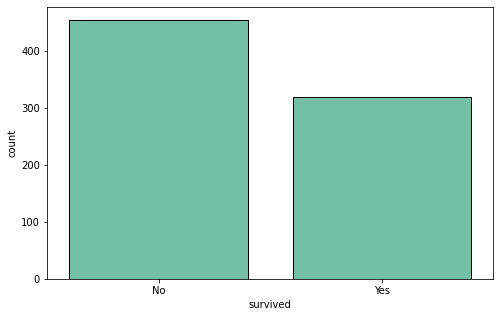

In [24]:
# recordemos como estaban distribuidos nuestros datos

plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df_titanic, x = "survived",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show()

### **Downsampling**

Ajustaremos la cantidad de datos de la categoría mayoritaria a la minoritaria. 

In [25]:
# lo primero que hacemos es sacar el número de registros que tenemos para la clase minoritaria
num_minoritarios = df_final["survived"].value_counts()[1]
num_minoritarios

320

In [26]:
# nos creamos un dataframe solo con las filas donde la variable respuesta sea Yes. 
minoritarios = df_final2[df_final["survived"] == 1]
minoritarios.head(2)

,survived,pclass,sex,age,fare,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
1,1,1,1,38.0,71.2833,1,1,0,0,1,0,1,0,1,0
2,1,3,1,26.0,7.9250,0,0,0,1,1,0,1,0,0,1


In [27]:
# extraemos una muestra de la categoría mayoritaria que sea del mismo tamaño que la clase minotaria

mayoritarios = df_final[df_final["survived"] == 0].sample(num_minoritarios, random_state = 42)
mayoritarios.head(2)

,survived,pclass,sex,age,fare,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
519,0,2,0,1.560022,-0.290585,-0.643861,0,0,1,1,0,0,1,0,1
68,0,2,0,0.308631,-0.615640,-0.643861,0,0,1,1,0,0,1,0,1


In [28]:
# Ahora es el momento de unir los *dataframes*
balanceado = pd.concat([minoritarios,mayoritarios],axis = 0)
balanceado.head(2)

,survived,pclass,sex,age,fare,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
1,1,1,1,38.0,71.2833,1.0,1,0,0,1,0,1,0,1,0
2,1,3,1,26.0,7.9250,0.0,0,0,1,1,0,1,0,0,1


In [29]:
# chequeamos como es nuestro dataframe ahora
balanceado["survived"].value_counts()

1    320
0    320
Name: survived, dtype: int64


### **Upsampling**

Ajustaremos la cantidad de datos de la categoría minoritaria a la mayoritaria. 

In [30]:
num_mayoritarios = df_final["survived"].value_counts()[0]
num_mayoritarios

455

In [31]:

# seleccionamos ls datos de la clase mayoritaria

mayoritarios2 = df_final[df_final["survived"]== 0]
mayoritarios2.head(2)

,survived,pclass,sex,age,fare,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
0,0,3,0,-0.525629,-0.850402,0.757803,0,0,1,1,0,0,1,1,0
4,0,3,0,0.558909,-0.792614,-0.643861,0,0,1,1,0,0,1,0,1


In [32]:
# hacemos una selección aleatoria de datos de la clase minoritaria, para tener el mismo número que la clase mayoritaria

minoritarios2 =df_final[df_final["survived"]==1].sample(num_mayoritarios, replace=True)
minoritarios2.head(2)

,survived,pclass,sex,age,fare,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
595,1,1,0,0.642335,-0.225574,0.757803,1,0,0,1,0,0,1,1,0
389,1,2,1,1.142891,0.503995,0.757803,0,0,1,1,0,1,0,1,0


In [33]:
# unimos los dos dataframes

balanceado2 = pd.concat([mayoritarios2,minoritarios2], axis = 0)
balanceado2.head(2)

,survived,pclass,sex,age,fare,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
0,0,3,0,-0.525629,-0.850402,0.757803,0,0,1,1,0,0,1,1,0
4,0,3,0,0.558909,-0.792614,-0.643861,0,0,1,1,0,0,1,0,1


In [34]:
# chequeamos como quedaron cada una de nuestras categorías

balanceado2["survived"].value_counts()

0    455
1    455
Name: survived, dtype: int64

## Desbalanceo usando imblearn (*RandomOverSample* y *RandomUnderSample*)

### **Downsampling**

In [35]:
# separamos los datos en X e y. Siendo X las variables predictoras e y  la variable a predecir. 

X = df_final.drop("survived", axis = 1)
y = df_final["survived"]

In [36]:
# iniciamos el método

down = RandomUnderSampler()

In [37]:
# ajustamos el modelo
X_down, y_down = down.fit_resample(X,y)

In [38]:
# chequeamos qué número tenemos de cada una de las categorías
y_down.value_counts()


0    320
1    320
Name: survived, dtype: int64

In [39]:
# lo siguiente que tendríamos que hacer, es juntar X_down e y_down para tener nuestro dataframe preparado para el siguiente paso

balanceado3 = pd.concat([X_down, y_down], axis = 1)
balanceado3.head()

,pclass,sex,age,fare,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True,survived
0,3,0,-0.025073,-0.810976,-0.643861,0,0,1,1,0,0,1,0,1,0
1,3,1,-0.358777,-0.734827,-0.643861,0,0,1,1,0,1,0,0,1,0
2,3,1,0.976039,-0.689680,0.757803,0,0,1,1,0,1,0,1,0,0
3,3,1,-1.526742,0.370361,2.159467,0,0,1,0,1,1,0,1,0,0
4,3,1,-1.610168,-0.272829,2.159467,1,0,0,0,1,1,0,1,0,0


### **Upsampling**

In [40]:
# iniciamos el método

upp = RandomOverSampler()

In [41]:
# como siempre, ajustamos el modelo

X_upp, y_upp = upp.fit_resample(X, y)

In [42]:
y_upp.value_counts()

0    455
1    455
Name: survived, dtype: int64

In [43]:
# juntamos los dos elementos creados y voilà! 

balanceado4 = pd.concat([X_upp, y_upp], axis = 1)
balanceado4.head()

,pclass,sex,age,fare,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True,survived
0,3,0,-0.525629,-0.850402,0.757803,0,0,1,1,0,0,1,1,0,0
1,1,1,0.809187,3.775012,0.757803,1,0,0,1,0,1,0,1,0,1
2,3,1,-0.191925,-0.801644,-0.643861,0,0,1,1,0,1,0,0,1,1
3,1,1,0.558909,2.461550,0.757803,0,0,1,1,0,1,0,1,0,1
4,3,0,0.558909,-0.792614,-0.643861,0,0,1,1,0,0,1,0,1,0


## Desbalanceo usando imblearn (SMOTE)

Este tal vez sea el método más usado, pero a la misma vez el más complejo de entender. Veamos un poco más en detalle como funciona. 

Hasta ahora lo que hemos aprendido para solucionar los problemas de desbalanceo es hacer un *downsampling* de la clase mayoritaria o un *upsampling* de la clase minoritaria. 

Sin embargo, estos enfoques tienen su propia debilidad. Si usamos el *upsampling*, estaremos duplicando algunos datos de la clase minoritaria, por lo que en realidad no estamos añadiendo niguna información nueva en nuestro set de datos. Por otro lado, si aplicamos el método de *downsampling* lo que hacemos es eliminar datos de forma aleatoria de la clase mayoritaria, por lo que estamos perdiendo información de los datos originales. 

Todo esto nos puede resultar algo raro y poco riguroso, es por esto que una de las soluciones para lidiar con estos problemas es generar nuevos registros a partir de los datos de la clase minoritaria. Esto es lo que se conoce como Técnica de Sobremuestreo de Minorías Sintéticas o SMOTE (*Synthetic Minority Oversampling Technique** en inglés). Tenemos que tener en cuenta que hay muchas variaciones de esta aproximación, nosotros en este caso veremos solo algunos ejemplos. 

**¿Cómo funciona SMOTE?** Lo usaremos para el *oversampling*

SMOTE genera nuevos registros basándose en la distancia de cada dato (normalmente utilizando la distancia euclidiana) y los vecinos más cercanos de la clase minoritaria, por lo que los ejemplos generados son diferentes de la clase minoritaria original, pero si similares. 

En resumen, el proceso para generar es el siguiente:

- Elige datos de forma aleatoria de la clase minoritaria.

- Calcula la distancia euclidiana entre los datos aleatorios y sus k vecinos más cercanos.

- Multiplica la diferencia del paso anterior por un número aleatorio entre 0 y 1, y añade el resultado a la clase minoritaria como nueva muestra.

- Repite el procedimiento hasta alcanzar la proporción deseada de la clase minoritaria.

Este método es eficaz porque los datos generados están relativamente cerca del espacio de características de la clase minoritaria, añadiendo así nueva "información" sobre los datos, a diferencia del método de *upsampling* original.

**¿Qué es Tomek?** Lo usaremos para el *undersampling* 


Tomek es una modificación de la técnica de submuestreo *Condensed Nearest Neighbors* (CNN). A diferencia del método CNN, que sólo selecciona aleatoriamente las muestras con sus k vecinos más cercanos de la clase mayoritaria que se desea eliminar, el método Tomek Links utiliza la regla para seleccionar el par de observaciones (digamos, a y b) que cumplen estas propiedades:

- El vecino más cercano de la observación a es b.

- El vecino más cercano de la observación b es a.

- Las observaciones a y b pertenecen a una clase diferente. Es decir, a y b pertenecen a la clase minoritaria y mayoritaria (o viceversa), respectivamente.


In [52]:
# para aplicar este método lo primero que tenemos que hacer es separar en X e y y en train y test como aprendimos en la lecciones de regresion lineal
y = df_final['survived']
X = df_final.drop('survived', axis=1)


#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [59]:
# iniciamos el método
os_us = SMOTETomek()

# ajustamos el modelo
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

 

In [61]:
y_train.value_counts()

0    313
1    229
Name: survived, dtype: int64

In [62]:
y_train_res.value_counts()

1    281
0    281
Name: survived, dtype: int64

In [67]:
# comprobemos como han quedado ahora las categorías después del ajuste

print (f"Distribution before resampling \n {y_train.value_counts()}" )
print("..............................................................")
print (f"Distribución después del ajuste \n {y_train_res.value_counts()}")

Distribution before resampling 
 0    313
1    229
Name: survived, dtype: int64
..............................................................
Distribución después del ajuste 
 1    281
0    281
Name: survived, dtype: int64


Después de haber hecho esta modificación ya estaríamos preparadas para ajustar nuestro modelo, esto todavía no lo hemos aprendido, lo haremos en la siguiente lección. 

-----------------------------------------------------------------


Todos estos ejemplos de balanceo de clases lo hemos puesto en práctica con un conjunto de datos específico, el que tenía las variables codificadas y estandarizadas. El ejercicio de hoy es que hagáis esto mismo, pero para el conjunto de datos que solo teníamos codificadas las variables categóricas. 

A modo de resumen de los que hemos hecho en este jupyter

- Hemos codificado las variables categóricas

- Hemos estandarizado las variables numéricas

- Hemos aprendido a gestionar los problemas de desbalanceo de la variable respuesta a través de distintas herramientas. 

De todas estas operaciones han sido surgiendo diferentes *dataframes*, lo ideal es que lo guardemos todos para poder ajustar diferentes modelos en función del preprocesamiento de los datos. Sin embargo, esto puede ser muy abrumador, por lo que vamos a guardar solo 4, estos van a ser: 

- El de las variables codificadas y estandarizadas

- El de las variables que estan **solo** estandarizadas

- En de las variables codificadas, estandarizadas y solucionados los problemas de balanceo con *upsampling* 

- En de las variables codificadas, estandarizadas y solucionados los problemas de balanceo con *downsampling*

En la siguiente celda tenéis el código 👇🏽

In [ ]:
df_final.to_csv("../files/titanic_esta_enco.csv")
df_final2.to_csv("../files/titanic_enco.csv")
balanceado4.to_csv("../files/titanic_esta_enco_up.csv")
balanceado3.to_csv("../files/titanic_esta_enco_down.csv")